## Systemer av lineære ordinære differensialligninger

Se avsnitt 3 av kapittel 4 i [kompendiet](https://mitt.uib.no/courses/45603/files?preview=5619281) for mere om dette.

In [2]:
# @title Import av moduler
import numpy as np
import matplotlib.pyplot as plt
# Her importeres en quizz modul for jupyter.
# Hvis den ikke allerede er installert blir den installert.
try:
  from jupyterquiz import display_quiz
except:
  !pip install jupyterquiz
  from jupyterquiz import display_quiz
# lenke til quizspørsmål
git_path="https://raw.githubusercontent.com/mbr085/V26MAT102/main/notebooks/uke6/"

Her ser vi på systemer av førsteordens differensialligninger på formen
$$
\begin{align}
  x'(t) &= f(t,x(t), y(t)), \newline
  y'(t) &= g(t,x(t), y(t))
\end{align}
$$
for funksjoner
$$
\begin{align}
\mathbb{R}^3 &\xrightarrow f \mathbb{R}, \newline
(t, x, y) &\mapsto f(t, x, y)
\end{align}
$$
og

$$
\begin{align}
\mathbb{R}^3 &\xrightarrow g \mathbb{R}, \newline
(t, x) &\mapsto g(t, x, y).
\end{align}
$$


## Eksempel

La $f$ og $g$ være funksjonene

$$
\begin{align}
  f(t, x, y) &= x, \newline
  g(t, x, y) &= 1
\end{align}
$$

og la oss sette startbetingelsene
$$
  x(0) = 2 \quad \text{og} \quad y(0) = 0.
$$

Siden $y'(t) = g(t, x(t), y(t)) = 1$ og $y(0) = 0$ må vi ha $y(t) = t$. (Hvorfor det?) 

Nå ser vi da at $f(t, x(t), y(t)) = x(t)$, så
betingelsen på $x(t)$ er at
$$
x'(t) = x(t) \quad \text{og} \quad x(0) = 2.
$$
Denne differensialligningen har vi studert allerede!

In [3]:
display_quiz(git_path+"systemer.json")

<IPython.core.display.Javascript object>

## Eulers metode

Hvis $t_0$ er gitt og vi numerisk vil løse differensialligningen
$$
\begin{align}
  x'(t) &= f(t,x(t), y(t)), \newline
  y'(t) &= g(t,x(t), y(y))
\end{align}
$$
med
$$x(t_0) = x_0 \quad \text{og} \quad y(t_0) = y_0,$$
da kan vi velge en skrittlengde $\Delta t$, og approksimere $x(t_0 + \Delta t)$ og $y(t_0 + \Delta t)$ med
$$
\begin{align}
  x(t_0 + \Delta t) &\approx x_0 + f(t_0, x_0, y_0) \cdot \Delta t \newline
  y(t_0 + \Delta t) &\approx y_0 + g(t_0, x_0, y_0) \cdot \Delta t.
\end{align}
$$
Vi setter nå
$$
\begin{align}
  x_1 &= x_0 + f(t_0, x_0, y_0) \cdot \Delta t \newline
  y_1 &= y_0 + g(t_0, x_0, y_0) \cdot \Delta t,
\end{align}
$$
og $t_1 = t_0 + \Delta t$.
Vi fortsetter på denne måten. Etter å ha funnet $x_0, x_1, \dots, x_n$ og
$y_0, y_1, \dots, y_n$ setter vi
$$
\begin{align}
  x_{n+1} &= x_n + f(t_n, x_n, y_n) \cdot \Delta t \newline
  y_{n+1} &= y_n + g(t_n, x_n, y_n) \cdot \Delta t,
\end{align}
$$
der $t_n = t_0 + n \Delta t$.

## Eksempel

Vi ser på
$$
\begin{align}
  x'(t) &= 2tx(t) + y(t), \newline
  y'(t) &= x(t)^{-2} + e^{-t}
\end{align}
$$
med initialbetingelsene $x(0) = 0.2$ og $y(0) = 1$.

## Funksjon som anvender Eulers metode på et system av differensialligninger

Vi utvider vår implementering av Eulers metode fra før til å en funksjon som kan løse par av differensialligninger.

In [3]:
import numpy as np

def euler_method(f, g, t0, tn, x0, y0, n):
  """
  Anvender Eulers metode for å løse differensialligningen x' = f(t, x, y) og y' = g(t, x, y).

  Args:
    f: Funksjonen som representerer x-delen av høyre side av differensialligningen.
    g: Funksjonen som representerer y-delen av høyre side av differensialligningen.
    t0: Startverdien for t.
    tn: Sluttverdien for t.
    x0: Startverdien for x.
    y0: Startverdien for y.
    n: Antall steg.

  Returns:
    En NumPy array som inneholder de approksimerte verdiene for x i hvert steg,
    En NumPy array som inneholder de approksimerte verdiene for y i hvert steg,
  """

  # Lager en array med t-verdier fra t0 til tn med n+1 punkter
  t_values = np.linspace(t0, tn, n + 1)
  # Initialiserer listene for x- og y-verdiene med startverdiene
  x_values = [x0]
  y_values = [y0]
  # Beregner steglengden
  delta_t = t_values[1] - t_values[0]

  # Gjennomfører Eulers metode for hvert steg
  for i in range(n):
    # Beregner neste x-verdi
    x_next = x_values[-1] + delta_t * f(t_values[i], x_values[-1], y_values[-1])
    # Beregner neste y-verdi
    y_next = y_values[-1] + delta_t * g(t_values[i], x_values[-1], y_values[-1])
    # Legger til de nye verdiene i listene
    x_values.append(x_next)
    y_values.append(y_next)

  # Returnerer t-verdiene og de beregnede x- og y-verdiene som NumPy arrays
  return t_values, np.array(x_values), np.array(y_values)

### Vi anvender den nye Eulers metode funksjonen på vårt eksempel

In [4]:
# Definterer funksjonene f og g

def f(t, x, y):
  return 2*t*x + y

def g(t, x, y):
  return x**(-2) + np.exp(-t)

In [5]:
# Definerer initialbetingelser og parametere
t0 = 0   # Starttidspunkt
x0 = 0.2  # Startverdi for x
y0 = 1   # Startverdi for y
tn = 1   # Slutt-tidspunkt
n = 10000  # Antall steg i beregningen

# Bruker Eulers metode for å løse differensialligningen
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

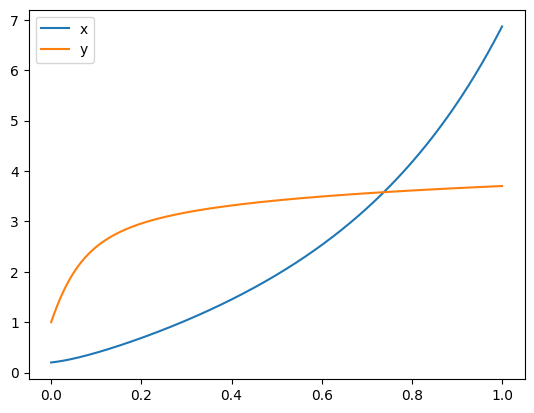

In [6]:
# Plotter x og y
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.legend()

## Oppgave

**Bruk koden over til å plotte løsninger for differensialligningen
$$
\begin{align}
  x'(t) &= y(t), \newline
  y'(t) &= -x(t) + y(t)
\end{align}
$$
med $x(0) = 1$ og $y(0) = 2$ for $t$-verdier i intervallet $[0, 10]$**

## [Tømming av sammenkoblede vanntanker](https://www.math.ttu.edu/~klong/ODESystems.pdf)

Vi ser på to vanntanker (åpne for luft på toppen) som er koblet sammen nær bunnen via et rør. I tillegg har hver tank også et dreneringsrør.
Vann strømmer mellom tankene samt ut gjennom avløpene. En skjematisk tegning av oppsettet er vist på figuren under.

![koblede kar](https://github.com/mbr085/V25MAT102/blob/main/notebooks/uke6/koblede_kar.png?raw=1)
[Av Katharine Long](https://www.math.ttu.edu/~klong/)

Hydrostatikk forteller oss at trykket på bunnen av en vannsøyle med høyde $h$ er $p = \rho gh$, der $\rho$ er vanntettheten og $g$ er gravitasjonsakselerasjonen. Du har kanskje sett Hagen-Poiseuille-loven for laminær strømning gjennom et sylindrisk rør: Den volumetriske strømningstakten $Q$ (volum væske per tidsenhet) bestemmes av trykkforskjellen $\Delta p$ mellom rørenes ender, rørenes geometri, og væskens viskositet:

$$
Q = \frac{\pi a^4 \Delta p}{8 \mu L}
$$

hvor a er rørradius, L er rørlengde og μ er den dynamiske viskositeten til væsken. Deretter er strømningstakten fra tank 1 til tank 2:

$$
Q_{12} = \frac{\pi a^4 \rho g}{8 \mu L} (h_1 - h_2)
$$

Strømningstaktene i avløpsrørene er:
$$
Q_{10} = \frac{\pi a^4 \rho g}{8 \mu L} h_1
$$

og

$$
Q_{20} = \frac{\pi a^4 \rho g}{8 \mu L} h_2
$$

Volumet av vann i tank 1 endres med takten:

$$
\frac{dV_1}{dt} = -Q_{12} - Q_{10}
$$

og i tank 2 endres volumet med takten:
$$
\frac{dV_2}{dt} = Q_{12} - Q_{20}
$$

Ved å merke oss at vannvolumet $V_i$ er søylehøyden $h_i$ ganget med arealet $A$ av tankens horisontale tverrsnitt, finner vi:

$$
\frac{dh_1}{dt} = \frac{\pi a^4 \rho g}{8 \mu L A} (-2 h_1 + h_2)
$$

og

$$
\frac{dh_2}{dt} = \frac{\pi a^4 \rho g}{8 \mu L A} (h_1 - 2 h_2)
$$

Størrelsen $ \frac{1}{\tau} \equiv \frac{\pi a^4 \rho g}{8 \mu L A} $ har dimensjonen tid$^{-1}$. Ved å gjøre transformasjonen til en dimensjonsløs tidsvariabel $\hat{t} = \frac{t}{\tau} $, $d\hat{t} = \tau^{-1} dt$, og deretter ignorere “hattene” på $\hat{t}$, får vi likningene:

$$
h_1' = -2h_1 + h_2
$$

og

$$
h_2' = h_1 - 2h_2
$$

## Reformulering

La oss skrive $x_0 = h_1(t_0)$ for høyden i den første tanken til tiden $t_0$ og
$y_0 = h_2(t_0)$ for høyden i den andre tanken til tiden $t_0$.

Skriver vi videre $x(t) = h_1(t)$ og $y(t) = h_2(t)$ er vi kommet frem til systemet
$$x'(t) = -2x(t) + y(t) = f(x, x(t), y(t)), \quad \text{med} \quad x(t_0) = x_0$$
og
$$y'(t) = x(t) - 2y(t) = g(x, x(t), y(t)), \quad \text{med} \quad y(t_0) = y_0$$
Dette systemet kan vi også løse med Eulers metode. Vi vil senere også finne eksakte løsninger for dette systemet.

In [7]:
# Definerer funksjonene f og g

def f(t, x, y):
  return -2*x + y

def g(t, x, y):
  return x - 2*y

In [8]:
# Setter initialbetingelser og parametere
t0 = 0   # Startverdi for t (tid)
x0 = 1.6  # Startverdi for x
y0 = 0.3  # Startverdi for y
tn = 5   # Sluttverdi for t (tid)
n = 1000  # Antall steg i beregningen

# Bruker Eulers metode for å løse differensialligningen
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

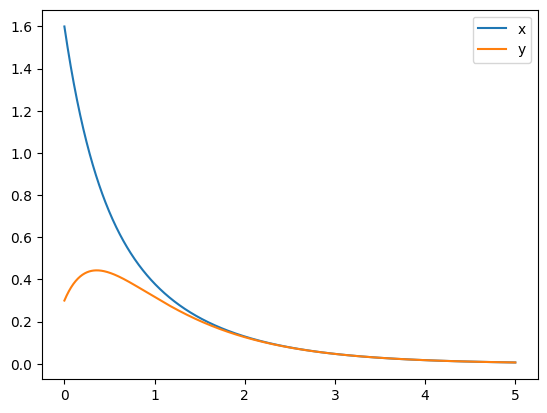

In [9]:
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.legend()

## Eksempel (Svingninger)

La oss ta for oss eksempel 9.9.3 i læreboken MIP. Vi ser for oss et lodd med masse $M$, som henger i en fjær med stivhet $k$. Vi antar at loddet blir trukket nedover og så blir sluppet. Formelen som beskriver hvordan loddets posisjon, $x$, varierer med tiden, $t$, kan beskrives av funksjonen:

$$
M x'' + \alpha x' + kx = 0,
$$

hvor $\alpha$ representerer luftmotstanden. Ved teorem 9.9.1 i læreboken kan vi finne en analytisk løsning til denne differensiallikningen. Skal vi derimot løse likningen numerisk ved hjelp av Eulers metode, kan vi innføre $y = x'$, og skrive differensiallikningen som et system:

$$
x' = y
$$

$$
y' = -\frac{\alpha}{M} y - \frac{k}{M} x
$$

### Oppgave

**Vis mellomregningene som trenges til personen ved siden av deg. Hva er $f(t, x, y)$ og $g(t, x, y)$ her?**

Vi tar nå utgangspunkt i at $M = 1$, $\alpha = 2$ og $k = 1$. I tillegg har vi initialbetingelsene $x(0) = 1$ og $x'(0) = 0$. Vi bruker koden vår til å løse dette problemet.

In [10]:
# Innfører M, alpha og k
M = 1
alpha = -0.1
k = 1

# Definerer funksjonene f og g

def f(t, x, y):
  return y

def g(t, x, y):
  return -(alpha* y + k * x) / M

In [11]:
# Seter initialverdier og parametre.
# Prøv å se hva som skjer når de forandres
t0 = 0   # Første t-verdi
x0 = 1  # Iinital x-verdi
y0 = 0
tn = 20  # Siste t-verdi
n = 10000   # Antall steg

# Anvend Eulers metode
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

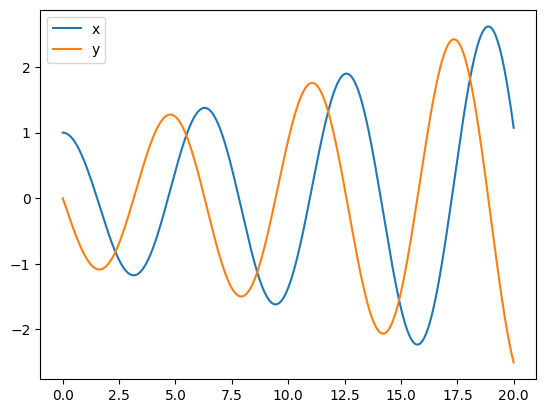

In [12]:
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.legend()

## Analytisk løsning

Vi kan løse denne differensialligning analytisk. Koden er lagt i en egen fil for ikke å gjøre denne notisboken for lang. Under importerer vi den.

In [14]:
# Denne løsningen bygger på
# https://math.libretexts.org/Courses/Cosumnes_River_College/Math_420%3A_Differential_Equations_(Breitenbach)/06%3A_Applications_of_Linear_Second_Order_Equations/6.02%3A_Spring-Mass_Problems_(With_Damping)

import numpy as np

def analytisk_svingning(M, alpha, k, t0, x0, y0):
    """
    Beregner den analytiske løsningen for en dampet harmonisk oscillator.

    Denne funksjonen løser en differensialligning som beskriver bevegelsen til et system
    bestående av en masse (M) festet til en fjær med konstant (k), hvor systemet er
    dempet av en faktor (alpha). Avhengig av verdien av diskriminanten, vil løsningen være
    enten eksponentielt avtagende, oscillerende, eller kritisk dempet.

    Args:
        M (float): Massens verdi (kg).
        alpha (float): Dempingsfaktoren (kan være positiv).
        k (float): Fjærkonstanten (N/m).
        t0 (float): Starttidspunkt (s).
        x0 (float): Startposisjon (m).
        y0 (float): Starthastighet (m/s).

    Returns:
        tuple: To funksjoner (x, y) som beskriver posisjon og hastighet over tid.
            - x(t) (funksjon): Posisjonen til systemet som funksjon av tid t.
            - y(t) (funksjon): Hastigheten til systemet som funksjon av tid t.

    Løsningene er basert på verdien av diskriminanten D:
        - Hvis D > 0 (to reelle røtter): Løsningene for x(t) og y(t) er eksponentielt avtagende.
        - Hvis D < 0 (komplekse røtter): Løsningene for x(t) og y(t) inneholder en oscillasjon med demping.
        - Hvis D = 0 (kritisk demping): Løsningene for x(t) og y(t) er lineære med eksponentiell avtagning.
    """
    # Beregner p og q som er nødvendige for å løse den analytiske løsningen
    p = k / M  # p = k/M
    q = alpha / M  # q = alpha/M

    # Beregner diskriminanten D (D = q^2 - 4p), som avgjør type løsning
    D = q**2 - 4*p

    if D > 0:
        # Når D er positiv, finnes to forskjellige løsninger for eksponentiell vekst
        # Beregn røttene lambda1 og lambda2 ved hjelp av funksjonene ff og gg
        lambda1 = ff(1, q, p)  # Første rot (lambda1)
        lambda2 = gg(1, q, p)  # Andre rot (lambda2)

        # Beregn konstantene C1 og C2 basert på initialbetingelsene (x0, y0)
        C2 = (y0 - lambda1 * x0) / (lambda2 - lambda1)  # Beregn C2
        C1 = x0 - C2  # Beregn C1

        # Definerer funksjonen x(t) som beskriver bevegelsen over tid
        def x(t):
            s = t - t0  # Tidsskift (forsinkelse i tid)
            return C1 * np.exp(lambda1 * s) + C2 * np.exp(lambda2 * s)  # Løsning for x(t)

        # Definerer funksjonen y(t) som beskriver bevegelsen over tid for y
        def y(t):
            s = t - t0  # Tidsskift
            return C1 * np.exp(lambda1 * s) * lambda1 + C2 * np.exp(lambda2 * s) * lambda2  # Løsning for y(t)

    elif D < 0:
        # Når D er negativ, er løsningen en oscillering (komplekse røtter)
        omega = np.sqrt(-D) / 2  # Beregner den oscillerende frekvensen (omega)

        # Beregn konstantene C1 og C2 basert på initialbetingelsene (x0, y0)
        C2 = (y0 + (q * x0) / 2) / omega  # Beregn C2
        C1 = x0  # Sett C1 lik x0

        # Definerer funksjonen x(t) som beskriver bevegelsen over tid med oscillasjon
        def x(t):
            s = t - t0  # Tidsskift
            return np.exp(-q * s / 2) * (C1 * np.cos(omega * s) + C2 * np.sin(omega * s))  # Løsning for x(t)

        # Definerer funksjonen y(t) som beskriver bevegelsen over tid for y
        def y(t):
            s = t - t0  # Tidsskift
            return - 0.5 * q * x(t) + omega * np.exp(-q * s / 2) * (-C1 * np.sin(omega * s) + C2 * np.cos(omega * s))  # Løsning for y(t)

    else:
        # Når D er null, er løsningen kritisk demping (en rot)
        C1 = x0  # Sett C1 lik x0
        C2 = y0 + (2 * x0) / q  # Beregn C2

        # Definerer funksjonen x(t) som beskriver bevegelsen over tid med kritisk demping
        def x(t):
            s = t - t0  # Tidsskift
            return np.exp(-q * s / 2) * (C1 + C2 * s)  # Løsning for x(t)

        # Definerer funksjonen y(t) som beskriver bevegelsen over tid for y
        def y(t):
            s = t - t0  # Tidsskift
            return np.exp(-q * s / 2) * (-0.5 * q * (C1 + C2*s) + C2)  # Løsning for y(t)

    # Returnerer funksjonene x(t) og y(t) som kan brukes til å beregne bevegelsen over tid
    return x, y

In [15]:
help(analytisk_svingning)

Help on function analytisk_svingning in module __main__:

analytisk_svingning(M, alpha, k, t0, x0, y0)
    Beregner den analytiske løsningen for en dampet harmonisk oscillator.
    
    Denne funksjonen løser en differensialligning som beskriver bevegelsen til et system
    bestående av en masse (M) festet til en fjær med konstant (k), hvor systemet er 
    dempet av en faktor (alpha). Avhengig av verdien av diskriminanten, vil løsningen være
    enten eksponentielt avtagende, oscillerende, eller kritisk dempet.
    
    Args:
        M (float): Massens verdi (kg).
        alpha (float): Dempingsfaktoren (kan være positiv).
        k (float): Fjærkonstanten (N/m).
        t0 (float): Starttidspunkt (s).
        x0 (float): Startposisjon (m).
        y0 (float): Starthastighet (m/s).
    
    Returns:
        tuple: To funksjoner (x, y) som beskriver posisjon og hastighet over tid.
            - x(t) (funksjon): Posisjonen til systemet som funksjon av tid t.
            - y(t) (funksjon

In [16]:
# Vi gjør antall steg, n, mindre for å få en forskjell mellom numerisk og eksakt løsning.
# Prov å se hva som skjer med større og mindre verdier for n

n = 1000   # Antall steg

# Anvend Eulers metode
t_values, x_values, y_values = euler_method(f, g, t0, tn, x0, y0, n)

In [17]:
x, y = analytisk_svingning(M, alpha, k, t0, x0, y0)

In [18]:
t_analytisk = np.linspace(t0, tn, 200)
x_analytisk = x(t_analytisk)
y_analytisk = y(t_analytisk)


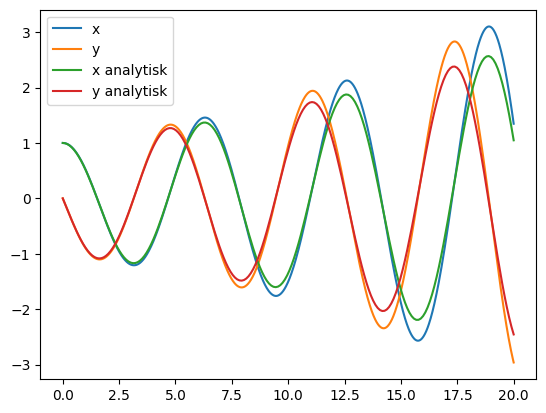

In [19]:
plt.plot(t_values, x_values, label='x')
plt.plot(t_values, y_values, label='y')
plt.plot(t_analytisk, x_analytisk, label='x analytisk')
plt.plot(t_analytisk, y_analytisk, label='y analytisk')
plt.legend()

## Løsning av differensialligninger med scipy

Det finnes innebyggede funksjoner i python for å løse differensialligninger. De
bruker metoder som er mere effektive enn Eulers metode. I utgangspunktet bruker de
fjerdeordens Runge Kutta metoden som er beskrevet i kompendiet til MAT 102,
men det er mulig å få dem til å benytte andre metoder. Hva som er best metode avhenger
av hvilken differensialligning vi vil løse.

In [20]:
from scipy.integrate import solve_ivp

In [21]:
# vi kan bruke funksjonene fra før, men det er ikke den beste måten å bruke de innebyggede funksjonene på
def sving(t, z):
    x, y = z
    return [f(t, x, y), g(t, x, y)]

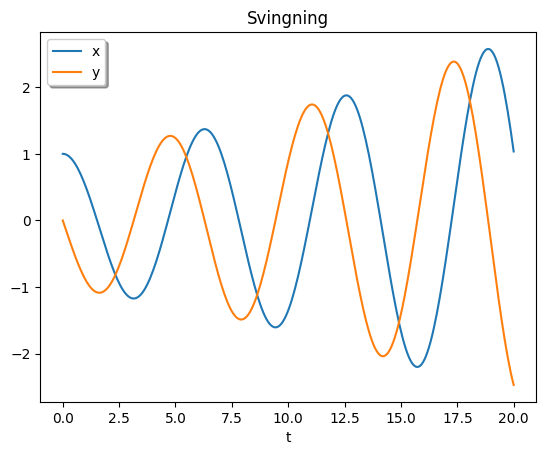

In [22]:
sol = solve_ivp(sving, [0, 20], [1, 0], dense_output=True)
t = np.linspace(0, 20, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Svingning')
plt.show()

In [23]:
# Denne funksjonen passer bedre med brukergrensesnittet til solve_ivp
def svingning(t, z, M, alpha):
    x, y = z
    return [y, -(alpha* y + k * x) / M]

In [24]:
sol = solve_ivp(svingning, [0, 20], [1, 0], args=(1, -0.1), dense_output=True)

In [ ]:
t = np.linspace(0, 20, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Svingning')
plt.show()

## Lotka-Volterra-modellen for oscillerende kjemiske reaksjoner

Dette er den tidligste foreslåtte forklaringen på hvorfor en reaksjon kan oscillerere. I 1920 foreslo Lotka følgende reaksjonsmekanisme (med tilhørende hastighetsligninger). Hvert reaksjonstrinn refererer til den **molekylære** mekanismen der reaktantmolekylene kombineres for å produsere mellomprodukter eller sluttprodukter. For eksempel kombinerer i trinn 1 et molekyl av art A seg med et molekyl av art X for å danne to molekyler av art X. Dette trinnet reduserer antallet molekyler av A (og øker antallet av X) med en hastighet som er proporsjonal med produktet av konsentrasjonene av A og X. Bidrag fra de molekylære reaksjonstrinnene til de differensielle hastighetslovene:  

1. $ A + X \rightarrow 2X $, med reaksjonshastighet $ k_1 $  
2. $ X + Y \rightarrow 2Y $, med reaksjonshastighet $ k_2 $  
3. $ Y \rightarrow B $, med reaksjonshastighet $ k_3 $  

De effektive hastighetslovene for reaktanten A, produktet B, og mellomproduktene X og Y finnes ved å summere bidragene fra hvert trinn:  

$$
\frac{d[A]}{dt} = -k_1 [A][X]
$$  
$$
\frac{d[X]}{dt} = k_1 [A][X] - k_2 [X][Y]
$$  
$$
\frac{d[Y]}{dt} = k_2 [X][Y] - k_3 [Y]
$$  
$$
\frac{d[B]}{dt} = k_3 [Y]
$$  

**Instruksjoner:**  
Anta at konsentrasjonen av reaktanten A faktisk holdes konstant (den tilføres systemet med en hastighet som tilsvarer fjerningen ved reaksjonen). Merk også at  

$$
\frac{d(A+X+Y+B)}{dt} = 0
$$  

Dette betyr at summen $ A + X + Y + B $ alltid er konstant. Spesielt gjelder at $ A + B + X + Y = A_0 + X_0 + Y_0 $, forutsatt at det ikke er noe produkt B til stede i starten. Dette forteller oss at vi ikke trenger å løse ODE-en for $ B $, fordi $ B = X_0 - X + Y_0 - Y $ hvis vi kjenner $ X(t) $ og $ Y(t) $. Dermed kan systemet reduseres til to ODE-er for $ X $ og $ Y $ alene. Skriv opp systemet av differensialligninger i $X$ og $Y$ og løs for disse to med randbetingelsene $A = 1$, $X_0 = 1$, $Y_0 = 1$, $k_1 = 0.3$, $k_2 = 0.2$ og $k_3 = 0.3$.

In [ ]:
# Denne funksjonen passer bedre med brukergrensesnittet til solve_ivp
def lotkaVoltera(t, z, A, k1, k2, k3):
    x, y = z
    return [k1 * A * x - k2 * x * y, k2 * x * y - k3 * y]

In [ ]:
sol = solve_ivp(lotkaVoltera, [0, 50], [1, 1], args=(1, 0.3, 0.2, 0.3), dense_output=True)

In [ ]:
t = np.linspace(0, 50, 300)
z = sol.sol(t)

plt.plot(t, z.T)
plt.xlabel('t')
plt.legend(['x', 'y'], shadow=True)
plt.title('Lotka-Volterra System')
plt.show()

## Oppgave

Bruk Eulers metode til å løse Lotka Volterra systemet over.

# Quiz

Prøv om du kan svare på
[quiz fra eksamen i fjor](https://mitt.uib.no/courses/50911/quizzes/48374).

Advarsel: I quizen er $y = y(x)$ en funksjon av $x$, og ikke av $t$ som hos oss.